# Comparisons

In this notebook we analyze the proteins in the Johnston, Thurgood, and Mayer papers. First, we extract their total and differential proteins. We also sort the differential proteins into those that are upregulated and those that are downregulated. After we extract their data, we make a venn diagram comparing their differential proteins, and another venn diagram comparing their total proteins. We then do a pathway enrichment on the differential proteins. Finally, we make a venn diagram comparing the total proteins in each paper to the total proteins we found.

In [1]:
johnston_file = "data/134638_0_supp_38937_p0y7zb.xlsx"
mayer_file = "data/133399_0_supp_15943_4ybsvb.xlsx"

## Mayer Paper

Dowload and import supplementary table 3, use after imputation sheets (Mayer et al., 2018)
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5795392/bin/supp_RA117.000425_133399_0_supp_15943_4ybsvb.xlsx

I parse the dataframe and extract all the names of identified proteins, all the proteins labeled as significantly upregulated (+ in t-test difference) and downregulated (- in t-test difference), and differential (+ in t-test).
The differential and total proteins identified will be used to generate venn diagrams.
The upregulated and downregulated will be used to generate a functional pathay analysis.
In the paper they found 440 upregulated and 427 downregulated, however, these numbers double-count some proteins. This analysis finds 425 upregulated and 376 downregulated, none are double-counted in this analysis. There are 6, 945 total proteins identified in the paper.

In [2]:
import pandas as pd
import requests
import os.path
import os
from os import path
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3

Since this paper differentiated between nuclear and cytoplasmic, we have to read in 2 files. First, we pull the nuclear file and extract the significant, upregulated, and downregulated proteins.

In [3]:
ne_sheet_name = "NE_after imputation"
#The other is "NE_before imputation"
m_ne_df = pd.read_excel(mayer_file, sheet_name = ne_sheet_name)

In [4]:
m_sig_ne = m_ne_df.loc[m_ne_df['Student\'s t-test Significant CLL vs elderly Bcells'] == '+']
m_up_ne = m_sig_ne.loc[m_sig_ne['Student\'s t-test Difference  CLL vs  elderly B cells'] > 0]
m_down_ne = m_sig_ne.loc[m_sig_ne['Student\'s t-test Difference  CLL vs  elderly B cells'] < 0]

Next, we pull the cytoplasmic file and extract the significant, upregulated, and downregulated proteins.

In [5]:
mayer_cyt_sheet_name = "CYT_after imputation"
m_cyt_df = pd.read_excel(mayer_file, sheet_name= mayer_cyt_sheet_name,
                         skiprows = 1) #There is a header saying sup. table s3

In [6]:
m_sig_cyt = m_cyt_df.loc[m_cyt_df['Student\'s t-test Significant CLL vs elderly B cells'] == '+']
m_up_cyt = m_sig_cyt.loc[m_sig_cyt['Student\'s t-test Difference  CLL vs  elderly B cells'] > 0]
m_down_cyt = m_sig_cyt.loc[m_sig_cyt['Student\'s t-test Difference  CLL vs  elderly B cells'] < 0]

In [7]:
m_diff = []

In [8]:
sig_frames = [m_sig_ne, m_sig_cyt]
sig = pd.concat(sig_frames)

In [9]:
for protein in sig['Protein IDs'] :
    temp = protein.split(";")
    m_diff.append(temp[0])

In [10]:
m_upreg = []

In [11]:
up_frames = [m_up_ne, m_up_cyt]
m_u = pd.concat(up_frames)

In [12]:
for protein in m_u['Protein IDs'] :
    temp = protein.split(";")
    m_upreg.append(temp[0])

In [13]:
m_downreg = []

In [14]:
down_frames = [m_down_ne, m_down_cyt]
m_d = pd.concat(down_frames)

In [15]:
for protein in m_d['Protein IDs'] :
    temp = protein.split(";")
    m_downreg.append(temp[0])

The following cells extract all the proteins identified

In [16]:
m_tot = []

In [17]:
frames = [m_ne_df, m_cyt_df]
m_t = pd.concat(frames)

In [18]:
m_t.dropna(subset = ['Protein IDs'], inplace = True)

In [19]:
for protein in m_t['Protein IDs']:
    temp = protein.split(";")
    m_tot.append(temp[0])

Save to a file

In [20]:
#m_diff.to_csv('data/m_diff.csv')
#m_tot.to_csv('data/m_tot.csv')

## Johnston Paper
Download and import supplementary table 2 (Johnston et al., 2018)
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5880099/bin/supp_RA117.000539_134638_0_supp_38937_p0y7zb.xlsx

I parse the dataframe and extract all the names of identified proteins, all the proteins labeled as significantly upregulated (>0.3) and downregulated (<-0.3), and differential.
The differential and total proteins identified will be used to generate venn diagrams.
The upregulated and downregulated will be used to generate a functional pathay analysis.
In the paper they found 544 upregulated and 592 downregulated. This analysis finds 545 upregulated and 592 downregulated.

In [21]:
j_sheet_name = "CLL proteome"
j_df = pd.read_excel(johnston_file, sheet_name = j_sheet_name)

Here I extract all the proteins with a differential regulation score (>0.3 and <-0.3). I sort them into upregulated and downregulated as well as add them to the differential. I also extract the names of all proteins identified.

In [22]:
j_u = j_df.loc[j_df['Regulation score'] >= 0.3]
j_upreg = j_u['Protein group accession']

In [23]:
j_d = j_df.loc[j_df['Regulation score'] <= -0.3]
j_downreg = j_d['Protein group accession']

In [24]:
diff_frames = [j_downreg, j_upreg]
j_diff = pd.concat(diff_frames)

In [25]:
j_tot = j_df['Protein group accession']

Save to a file

In [26]:
#j_diff.to_csv('data/j_diff.csv')
#j_tot.to_csv('data/j_tot.csv')

## Overlap

Here I make venn diagrams looking at the overlaps between the papers

In [27]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3

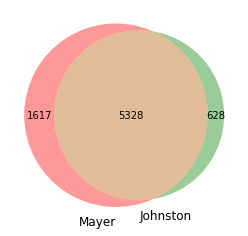

In [28]:
venn2(subsets = (set(m_tot), set(j_tot)), set_labels = ('Mayer', 'Johnston'))
#plt.savefig('data/total_overlap.png', bbox_inches='tight', dpi=300)
plt.show()

This venn diagram shows the overlap for the total proteins in Mayer and Johnston

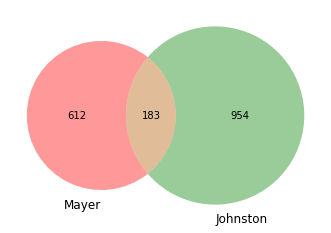

In [29]:
venn2(subsets = (set(m_diff), set(j_diff)), set_labels = ('Mayer', 'Johnston'))
#plt.savefig('data/diff_overlap_2.png', bbox_inches='tight', dpi=300)
plt.show()

This venn diagram shows the overlap between differential proteins of Mayer and Johnston

## Pathway Analysis

Here I am doing a functional pathway enrichment. I import GProfiler and run a KEGG analysis on the significantly upregulated and downregulated proteins for each paper.

In [30]:
from gprofiler import GProfiler

In [31]:
gp = GProfiler(return_dataframe = True)

In [32]:
johnston_upregulated_gp = gp.profile(organism='hsapiens', query=list(j_upreg))
johnston_upregulated_gp[johnston_upregulated_gp["source"] == "KEGG"]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
136,KEGG,KEGG:03040,Spliceosome,2.851014e-22,True,Spliceosome,150,240,37,8000,0.154167,0.246667,query_1,[KEGG:00000]
535,KEGG,KEGG:03015,mRNA surveillance pathway,5.066431e-08,True,mRNA surveillance pathway,98,240,18,8000,0.075000,0.183673,query_1,[KEGG:00000]
544,KEGG,KEGG:00280,"Valine, leucine and isoleucine degradation",8.914372e-08,True,"Valine, leucine and isoleucine degradation",48,240,13,8000,0.054167,0.270833,query_1,[KEGG:00000]
1058,KEGG,KEGG:03420,Nucleotide excision repair,3.496473e-02,True,Nucleotide excision repair,45,240,7,8000,0.029167,0.155556,query_1,[KEGG:00000]
1060,KEGG,KEGG:04330,Notch signaling pathway,3.512498e-02,True,Notch signaling pathway,59,240,8,8000,0.033333,0.135593,query_1,[KEGG:00000]


In [33]:
johnston_downregulated_gp = gp.profile(organism='hsapiens', query=list(j_downreg))
johnston_downregulated_gp[johnston_downregulated_gp["source"] == "KEGG"]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
168,KEGG,KEGG:04670,Leukocyte transendothelial migration,0.000014,True,Leukocyte transendothelial migration,114,291,18,8000,0.061856,0.157895,query_1,[KEGG:00000]
210,KEGG,KEGG:04142,Lysosome,0.000083,True,Lysosome,128,291,18,8000,0.061856,0.140625,query_1,[KEGG:00000]
256,KEGG,KEGG:04062,Chemokine signaling pathway,0.000551,True,Chemokine signaling pathway,190,291,21,8000,0.072165,0.110526,query_1,[KEGG:00000]
321,KEGG,KEGG:04015,Rap1 signaling pathway,0.002607,True,Rap1 signaling pathway,210,291,21,8000,0.072165,0.100000,query_1,[KEGG:00000]
350,KEGG,KEGG:04611,Platelet activation,0.004443,True,Platelet activation,124,291,15,8000,0.051546,0.120968,query_1,[KEGG:00000]
358,KEGG,KEGG:04070,Phosphatidylinositol signaling system,0.004946,True,Phosphatidylinositol signaling system,97,291,13,8000,0.044674,0.134021,query_1,[KEGG:00000]
398,KEGG,KEGG:05417,Lipid and atherosclerosis,0.010659,True,Lipid and atherosclerosis,214,291,20,8000,0.068729,0.093458,query_1,[KEGG:00000]
409,KEGG,KEGG:05135,Yersinia infection,0.012997,True,Yersinia infection,136,291,15,8000,0.051546,0.110294,query_1,[KEGG:00000]
411,KEGG,KEGG:04662,B cell receptor signaling pathway,0.013457,True,B cell receptor signaling pathway,79,291,11,8000,0.037801,0.139241,query_1,[KEGG:00000]
475,KEGG,KEGG:05140,Leishmaniasis,0.027925,True,Leishmaniasis,72,291,10,8000,0.034364,0.138889,query_1,[KEGG:00000]


In [34]:
mayer_upregulated_gp = gp.profile(organism='hsapiens', query=list(m_upreg))
mayer_upregulated_gp[mayer_upregulated_gp["source"] == "KEGG"]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
479,KEGG,KEGG:00620,Pyruvate metabolism,0.002048,True,Pyruvate metabolism,47,204,8,8000,0.039216,0.170213,query_1,[KEGG:00000]
516,KEGG,KEGG:01100,Metabolic pathways,0.005310,True,Metabolic pathways,1491,204,61,8000,0.299020,0.040912,query_1,[KEGG:00000]
545,KEGG,KEGG:00630,Glyoxylate and dicarboxylate metabolism,0.008932,True,Glyoxylate and dicarboxylate metabolism,30,204,6,8000,0.029412,0.200000,query_1,[KEGG:00000]


In [35]:
mayer_downregulated_gp = gp.profile(organism='hsapiens', query=list(m_downreg))
mayer_downregulated_gp[mayer_downregulated_gp["source"] == "KEGG"]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
34,KEGG,KEGG:04610,Complement and coagulation cascades,3.480036e-13,True,Complement and coagulation cascades,85,188,20,8000,0.106383,0.235294,query_1,[KEGG:00000]
44,KEGG,KEGG:04640,Hematopoietic cell lineage,4.740364e-10,True,Hematopoietic cell lineage,95,188,18,8000,0.095745,0.189474,query_1,[KEGG:00000]
78,KEGG,KEGG:04512,ECM-receptor interaction,1.456775e-07,True,ECM-receptor interaction,88,188,15,8000,0.079787,0.170455,query_1,[KEGG:00000]
91,KEGG,KEGG:04611,Platelet activation,3.699831e-07,True,Platelet activation,124,188,17,8000,0.090426,0.137097,query_1,[KEGG:00000]
109,KEGG,KEGG:04613,Neutrophil extracellular trap formation,1.455110e-06,True,Neutrophil extracellular trap formation,189,188,20,8000,0.106383,0.105820,query_1,[KEGG:00000]
158,KEGG,KEGG:04145,Phagosome,2.947435e-05,True,Phagosome,147,188,16,8000,0.085106,0.108844,query_1,[KEGG:00000]
204,KEGG,KEGG:04810,Regulation of actin cytoskeleton,2.810250e-04,True,Regulation of actin cytoskeleton,216,188,18,8000,0.095745,0.083333,query_1,[KEGG:00000]
247,KEGG,KEGG:04510,Focal adhesion,1.718691e-03,True,Focal adhesion,200,188,16,8000,0.085106,0.080000,query_1,[KEGG:00000]
274,KEGG,KEGG:05140,Leishmaniasis,4.191412e-03,True,Leishmaniasis,72,188,9,8000,0.047872,0.125000,query_1,[KEGG:00000]
286,KEGG,KEGG:04670,Leukocyte transendothelial migration,6.897581e-03,True,Leukocyte transendothelial migration,114,188,11,8000,0.058511,0.096491,query_1,[KEGG:00000]


# Overlap with our paper

First I import and load our data as port

In [36]:
import longitudinalCLL

In [37]:
prot = longitudinalCLL.get_proteomic()
prot.load_dataset(version='July_noMBR_FP', subjects = [])

,Subject1_B_cells_062920_C_10,Subject1_B_cells_062920_C_11,Subject1_B_cells_062920_C_12,Subject1_B_cells_062920_C_13,Subject1_B_cells_062920_C_9,Subject1_B_cells_072920_C_4,Subject1_B_cells_072920_C_5,Subject1_B_cells_072920_C_6,Subject1_B_cells_072920_C_8,Subject1_B_cells_072920_C_9,...,Subject2_T_cells_062920_F_12,Subject2_T_cells_062920_F_13,Subject2_T_cells_062920_F_14,Subject2_T_cells_062920_F_9,Subject2_T_cells_072920_F_1,Subject2_T_cells_072920_F_3,Subject2_T_cells_072920_F_4,Subject2_T_cells_072920_F_5,Subject2_T_cells_072920_F_6,Subject2_T_cells_072920_F_8
Protein ID,,,,,,,,,,,,,,,,,,,,,
A0A0B4J2D5,3203277.5,4697996.0,7346776.5,8472867.0,4280919.5,0.0,4787781.50,2153860.2,5444238.5,5514300.50,...,0.0,4905873.00,0.0,3405266.0,4656720.00,1673629.9,6060600.5,2407679.5,7791855.0,5542659.50
A0AVT1,1917388.2,3033529.2,3773018.8,1865758.6,5191332.5,3332031.5,2464089.00,2290868.2,2486001.2,2596365.20,...,1091121.4,630647.25,576871.9,0.0,0.00,0.0,0.0,827356.1,1260652.0,0.00
A0FGR8,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,1514363.4,866311.94,0.0,0.0,0.00,0.0,0.0,0.0,653698.6,879074.56
A6NHR9,2650513.5,0.0,3788095.8,0.0,0.0,1845555.5,933499.44,1958162.5,1604476.4,418360.38,...,0.0,0.00,0.0,0.0,430484.97,0.0,0.0,0.0,538303.6,948190.40
A8K2U0,0.0,0.0,0.0,1149867.8,0.0,0.0,0.00,0.0,2272656.2,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O15068,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
Q14C86,0.0,0.0,1139333.0,0.0,0.0,0.0,0.00,994677.5,0.0,632145.70,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,1029046.4,0.00
Q8N4T8,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00


Now I make the data into a dataframe so I can compare it to the other papers

In [38]:
payne_df = prot.data_frame.reset_index()

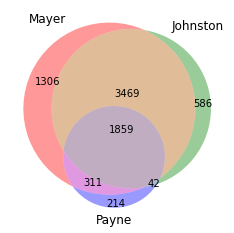

In [39]:
venn3(subsets = (set(m_tot), set(j_tot), set(payne_df['Protein ID'])), set_labels = ('Mayer', 'Johnston', 'Payne'))
#plt.savefig('data/payne_overlap.png', bbox_inches='tight', dpi=300)
plt.show()